<img src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Uexternado.jpg" width="240" height="240" align="right"/>

# Modelos Supervisados
## Validación Cruzada y Pipelines

# Evaluación


La evaluación es una de las tareas necesarias en los procesos de modelación. Permite elegir entre diferentes opciones, determinar si un modelo es adecuado o no para un problema en específico y hacer monitoreo y control, entre otras tareas. Los modelos son tan útiles como la calidad de sus predicciones; por lo tanto, el objetivo no es crear modelos, sino crear modelos de alta calidad con poder predictivo. A continuación listamos algunos de los apsectos a tenber en cuenta en los proceso de evaluación.

+ Metrics-loss function 
+ Bias
+ Variance
+ Robustness 
+ Stability. Model drift.
+ Operational-Business applicable.
+ Interpretability

# Métricas


En [scikit-learn](https://scikit-learn.org/stable/) están programadas varias [métricas](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics), las cuales pueden ser usadas para la evaluación de modelos supervisados y no supervisados. Para el caso de modelos supervisados, las métricas varian dependiendo de la naturaleza de la variable objetivo; esto es, regresión o clasificación.

Un resumen de diferentes métricas con su explicación se puede encontrar en este [enlace](https://github.com/neptune-ai/blog-binary-classification-metrics/blob/master/binary_classification_metrics_cheathsheet.pdf).

Un paper que muestra algunas de las métricas más utlizadas en modelos no supervisados se encuentra en este [enlace](https://arxiv.org/pdf/1905.05667.pdf).

## En Regresión


La tasa de error de un modelo predictivo puede evaluarse aplicando varias métricas derivadas de funciones de perdida en ML y en estadística. El concepto básico de la evaluación de la precisión en el análisis de regresión consiste en comparar la variable objetivo con la predicha.
Recordamos como hallar algunas de las métricas más usadas:

+ $RMSE=\frac{1}{N}\sqrt{\sum_{i=1}^{N}(y_{i}-\hat{y}_{i})^2}$, Root Mean Squared Error

+ $R^{2}=1-\frac{\sum_{i=1}^{N}(y_{i}-\hat{y}_{i})^{2}}{\sum_{i=1}^{N}(y_{i}-\bar{y})^{2}}$, R-squared (Coefficient of determination) 

+ $MAPE=\frac{1}{N}\sum_{i=1}^{N}\left|\frac{y_{i}-\hat{y}_{i}}{y_{i}}\right|$, Mean absolute percentage error

## En Clasificación



+ $\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}$, Representa la tasa general de predicciones correctas.  


+ $\text{Precision} = \frac{TP}{TP+FP}$,Representa la tasa de acierto de una clase pronósticada.  


+ $\text{Recall}=\text{Sensitivity} = \frac{TP}{TP+FN}$, Representa la tasa de predicción correcta de una clase concreta. 


+ $\text{F1} = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$, Es la media geométrica entre la precisión y recall. 


+ $\text{BACC}=\frac{TPR+TNR}{2}$, Promedio entre sensibilidad y especificidad. Útil en problemas de class imbalance.

> Hay una medida que ha venido tomando fuerza y es el MCC. Tiene en cuenta los cuatro valores de la matriz de confusión, y un valor alto, cercano a 1, significa que ambas clases se predicen bien, incluso si una clase está desproporcionadamente infra (o sobre) representada, (problema de class imbalance).

**AUC-ROC**: Una curva ROC es una representación gráfica de relación entre (sensibilidad=TPR) y (1-especificidad=FPR) cuando el punto de corte cambia. Representa el grado o medida de separabilidad. Es la medida de la capacidad de un clasificador para distinguir entre clases y se utiliza como resumen de la curva ROC. Cuanto mayor sea el AUC, mejor será el modelo para predecir las clases 0 como 0 y las clases 1 como 1. 
AUC-ROC se utliza frecuentemente y no está exenta de problemas; en el caso de class imbalance su resultado podría ser engañoso. Una curva ROC puede seguir pareciendo buena, mejor que la aleatoria, mientras clasifica erróneamente la mayor parte o la totalidad de la clase minoritaria. En este [enlace](https://www.bioestadistica.uma.es/analisis/roc1/) podemos probar con diferentes puntos de corte para comprender la construcción de la curva ROC.

# Sesgo y Varianza (Bias-variance tradeoff)

**Sesgo** es el error (perdida) esperado en las predicciones de un modelo.Es el error en el que incurrimos debido a las suposiciones del modelo (lineal, árbol de decisión con 5 nodos, una red neuronal de tres capas y dos  neuronas por capa, ...). Tener un sesgo alto significa que el modelo presenta underfitting; es decir, cuando su desempeño en predicción es bajo en los datos de entrenamiento. Esto se debe a que el modelo es incapaz de capturar la relación entre la variable de de entrada  y los variable objetivo.
Con alto sesgo ambos error con datos de entrenamiento y datos de evaluación (test) pueden ser altos. 

La **varianza** escribe en qué medida el mejor modelo depende del conjunto de entrenamiento. Es decir, la varianza cuantifica la diferencia en las predicciones, al cambiar un conjunto de datos.
la varianza aumenta cuando los modelos se vuelven más complejos y disminuye con conjuntos de entrenamiento más grandes. La obtención de una alta varianza significa que el modelo presenta overfitting. El modelo presenta overfitting cuando el modelo funciona bien con los datos de entrenamiento pero no lo hace con los datos de evaluación. Esto se debe a que el modelo está memorizando los datos que ha utlizado para ajuste y es incapaz de generalizar a ejemplos no utilizados. El modelo está capturando patrones en los datos de entrenamiento causados por el azar en lugar de las verdaderas propiedades de la función subyacente.
En casos de alta varianza el error de entrenamiento puede ser bajo pero el error en el conjunto de evaluación (test) puede ser alto.

> Error = bias + variance + (noise)



+ Ensemble methods reduce la varianza. (stacking, bagging and boosting)
+ En DT aal aumentar la profundidad se reduce el sesgo y se aumenta la varianza.
+ En ANN, los modelos más profundos pueden aumentar la varianza, pero disminuir el sesgo.
+ En KNN por lo general al aumentar K se reduce la varianza y se aumenta el sesgo.

> Se debe buscar como propósito de modelación un equilibrio entre el sesgo y la varianza (Bias-variance tradeoff). 

## Validación cruzada

Hay un método ingenioso para desarrollar modelos generalizables que no se sobreajusten demasiado ni se subajusten demasiado, llamado *validación cruzada*.

**La validación cruzada** es un método general para evaluar cómo los resultados de un modelo predictivo (regresión, clasificación,...) *generalizarán* a un conjunto de datos independiente. En la regresión, la validación cruzada es un método para evaluar qué tan bien el modelo de regresión predecirá el valor dependiente de los puntos que no se usaron para *entrenar* el modelo.

La idea del método es simple:
1. Divida el conjunto de datos en dos grupos: el conjunto de datos de entrenamiento y el conjunto de datos de prueba.
+ Entrene una variedad de modelos en el conjunto de datos de entrenamiento.
+ Verifique la precisión de cada modelo en el conjunto de datos de prueba.
+ Al comparar estas precisiones, determine qué modelo es el mejor.

En la práctica, debe decidir cómo dividir los datos en grupos (es decir, qué tamaño deben tener los grupos). También es posible que desee repetir el experimento para que la evaluación no dependa de la forma en que divide los datos en grupos. Nos ocuparemos de estas preguntas en una conferencia posterior.

A medida que el modelo se vuelve más complejo ($m$ aumenta), la precisión siempre aumenta para el conjunto de datos de entrenamiento. ¡Pero, en algún momento, comienza a sobreajustar los datos y la precisión disminuye para el conjunto de datos de prueba! ¡Las técnicas de validación cruzada nos permitirán encontrar el punto óptimo para el parámetro $m$! (Piense: Ricitos de oro y los tres osos.)

Veamos este concepto para la relación entre mpg y caballos de fuerza en el conjunto de datos Auto. Usaremos el paquete scikit-learn para el análisis de validación cruzada en lugar de statsmodels, porque es mucho más fácil hacer una validación cruzada allí.

La validación cruzada es un proceso en la que se realizan $K$ particiones o **folds** de la base de datos y con ellos se realizan $K$ evaluaciones diferentes, de tal forma que todos los casos por lo menos una vez se encuentran en el conjunto de test. Básicamente en la evaluación $i$, la partición $i$ son los casos de test y el resto son los casos de entrenamiento. Finalmente, se realiza una media de los resultados obtenidos en las diferentes evaluaciones. En la siguiente imagen se ve un ejemplo de esto.

<img src="https://static.oschina.net/uploads/img/201609/26155106_OfXx.png" alt="cross-validation" width="500">

# K Fold

El método de validación cruzada de _k-fold_ implica dividir el conjunto de datos en _k_-particiones, también llamados _fold_. Cada subconjunto se mantiene mientras el modelo se entrena en todos los demás particiones. Este proceso se repite hasta que se determina la precisión para cada instancia en el conjunto de datos, y se proporciona una estimación de precisión general. Es un método robusto para estimar la precisión, y el tamaño de _k_ puede ajustar la cantidad de sesgo en la estimación, con valores populares establecidos en 5 y 10. 

Puede ver que informamos tanto la media como la desviación estándar de la medida de rendimiento. Al resumir las medidas de rendimiento, es una buena práctica resumir la distribución de las medidas, en este caso suponiendo una distribución gaussiana del rendimiento (un supuesto muy razonable) y registrando la desviación estándar y media.

In [1]:
data = list(range(1, 11))
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [2]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for train, validate in kf.split(data):
    print(train, validate)

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [5]:
#!pip install category_encoders

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
### import 
url= "https://raw.githubusercontent.com/Andres1984/Data-Analysis-with-R/master/Bases/50_Startups.csv"
df_starup = pd.read_csv(url)
encoder=ce.OneHotEncoder(cols=['State'],handle_unknown='return_nan',return_df=True,use_cat_names=True)
df_starup_enc = encoder.fit_transform(df_starup)
df_starup_enc.head()

,R&D Spend,Administration,Marketing Spend,State_New York,State_California,State_Florida,Profit
0,165349.20,136897.80,471784.10,1.0,0.0,0.0,192261.83
1,162597.70,151377.59,443898.53,0.0,1.0,0.0,191792.06
2,153441.51,101145.55,407934.54,0.0,0.0,1.0,191050.39
3,144372.41,118671.85,383199.62,1.0,0.0,0.0,182901.99
4,142107.34,91391.77,366168.42,0.0,0.0,1.0,166187.94


In [7]:
# SIMPLE. Enfoque de validación de HoldOut

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error 
X_train, X_test, y_train, y_test = train_test_split(df_starup_enc.drop(labels=['Profit', ], axis=1),df_starup_enc['Profit'], test_size=0.1, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
preds_test= model.predict(X_test)

print('R2 Score Test : %.3f' % r2_score(y_test, preds_test))
print('RMSE Test : %.3f' % mean_squared_error(y_test, preds_test, squared=False))
print('MAPE Score : %.3f' % mean_absolute_percentage_error(y_test, preds_test))

R2 Score Test : 0.935
RMSE Test : 9952.988
MAPE Score : 0.064


In [8]:
# K Fold Cross Validation DTR

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


X, y= df_starup_enc.drop(labels=['Profit', ], axis=1),df_starup_enc['Profit']
model = LinearRegression()
kfold_validation=KFold(10)
results_rmse=-cross_val_score(model,X,y,cv=kfold_validation, scoring='neg_root_mean_squared_error')
results_mape=-cross_val_score(model,X,y,cv=kfold_validation, scoring='neg_mean_absolute_percentage_error')
print("RMSE: %.3f (%.3f)" % (results_rmse.mean(), results_rmse.std()))
print("MAPE: %.3f (%.3f)" % (results_mape.mean(), results_mape.std()))

RMSE: 8892.041 (4928.436)
MAPE: 0.126 (0.213)


# Leave one out


Esto maximiza la cantidad de modelos que se entrenan, lo que aumenta los costos computacionales. Si bien los conjuntos de validación no se superponen, la superposición de los conjuntos de entrenamiento se maximiza, lo que aumenta la correlación de los modelos y sus errores de predicción. Como resultado, la varianza del error de predicción es mayor para un modelo con un mayor número de pliegues.

In [10]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
for train, validate in loo.split(data):
    print(train, validate)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [15]:
#Leave One Out Cross Validation(LOOCV)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

model = LinearRegression()

X, y= df_starup_enc.drop(labels=['Profit', ], axis=1),df_starup_enc['Profit']
leaveOO_validation=LeaveOneOut()
results_r2=cross_val_score(model,X,y,cv=shufleS, scoring='r2')
results_rmse=-cross_val_score(model,X,y,cv=leaveOO_validation, scoring='neg_root_mean_squared_error')
results_mape=-cross_val_score(model,X,y,cv=leaveOO_validation, scoring='neg_mean_absolute_percentage_error')
print("R2: %.3f (%.3f)" % (results_r2.mean(), results_r2.std()))
print("RMSE: %.3f (%.3f)" % (results_rmse.mean(), results_rmse.std()))
print("MAPE: %.3f (%.3f)" % (results_mape.mean(), results_mape.std()))

R2: 0.925 (0.043)
RMSE: 7373.153 (6832.056)
MAPE: 0.121 (0.356)


### Shuffle Split

La clase ShuffleSplit crea divisiones independientes con conjuntos de validación potencialmente superpuestos.

In [12]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=3, test_size=2, random_state=42)
for train, validate in ss.split(data):
    print(train, validate)

[5 0 7 2 9 4 3 6] [8 1]
[8 5 3 4 7 9 6 2] [0 1]
[0 6 8 5 3 7 1 4] [9 2]


In [13]:
# ShuffleSplit
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

X, y= df_starup_enc.drop(labels=['Profit', ], axis=1),df_starup_enc['Profit']
shufleS=ShuffleSplit(n_splits=10,test_size=0.1)
model = LinearRegression()

results_r2=cross_val_score(model,X,y,cv=shufleS, scoring='r2')
results_rmse=-cross_val_score(model,X,y,cv=shufleS, scoring='neg_root_mean_squared_error')
results_mape=-cross_val_score(model,X,y,cv=shufleS, scoring='neg_mean_absolute_percentage_error')
print("R2: %.3f (%.3f)" % (results_r2.mean(), results_r2.std()))
print("RMSE: %.3f (%.3f)" % (results_rmse.mean(), results_rmse.std()))
print("MAPE: %.3f (%.3f)" % (results_mape.mean(), results_mape.std()))

R2: 0.927 (0.073)
RMSE: 8064.228 (4356.438)
MAPE: 0.167 (0.188)


### Validación cruzada de series temporales 

La naturaleza de serie temporal de los datos implica que la validación cruzada produce una situación en la que los datos del futuro se utilizarán para predecir los datos del pasado. Esto es poco realista en el mejor de los casos y espionaje de datos en el peor, en la medida en que los datos futuros reflejan eventos pasados.

In [16]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

In [17]:
for train, validate in tscv.split(data):
    print(train, validate)

[0 1 2 3 4] [5]
[0 1 2 3 4 5] [6]
[0 1 2 3 4 5 6] [7]
[0 1 2 3 4 5 6 7] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [18]:
import pandas as pd

df_credit = pd.read_csv('data_credit')
df_credit=df_credit[['Default', 'emp_length_n', 'dti_n', 'revenue', 'loan_amnt', 'fico_n',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'home_ownership_n_MORTGAGE', 'home_ownership_n_OTHER',
       'home_ownership_n_OWN', 'home_ownership_n_RENT']]
df_credit=df_credit.groupby('Default', group_keys=False).apply(lambda x: x.sample(1000, random_state=123))
#df_credit['Default'].value_counts()
df_credit['Default'].value_counts(normalize=True)

Default
0    0.5
1    0.5
Name: proportion, dtype: float64

In [19]:
# SIMPLE. Enfoque de validación de HoldOut
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, precision_score, recall_score, balanced_accuracy_score, f1_score, matthews_corrcoef

X_train, X_test, y_train, y_test = train_test_split(df_credit.drop(labels=['Default', ], axis=1),df_credit['Default'], test_size=0.2, random_state=0, stratify=df_credit['Default'])

#model = DecisionTreeClassifier(random_state=1)
model = LogisticRegression(C=1e40, solver='newton-cg')

model.fit(X_train, y_train)
preds_test= model.predict(X_test)
prob_test= model.predict_proba(X_test)[:,1]

print('ACC : %.3f' % accuracy_score(y_test, preds_test))
print('Precision  : %.3f' %  precision_score(y_test, preds_test))
print('Recall : %.3f' % recall_score(y_test, preds_test))
print('BACC : %.3f' % balanced_accuracy_score(y_test, preds_test))
print('F1-Score : %.3f' % f1_score(y_test, preds_test))
print('AUC-ROC : %.3f' % roc_auc_score(y_test, prob_test))
print('MCC : %.3f' % matthews_corrcoef(y_test, preds_test))

ACC : 0.588
Precision  : 0.576
Recall : 0.660
BACC : 0.588
F1-Score : 0.615
AUC-ROC : 0.644
MCC : 0.177


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Text(0.5, 1.0, 'ROC curve and KS')

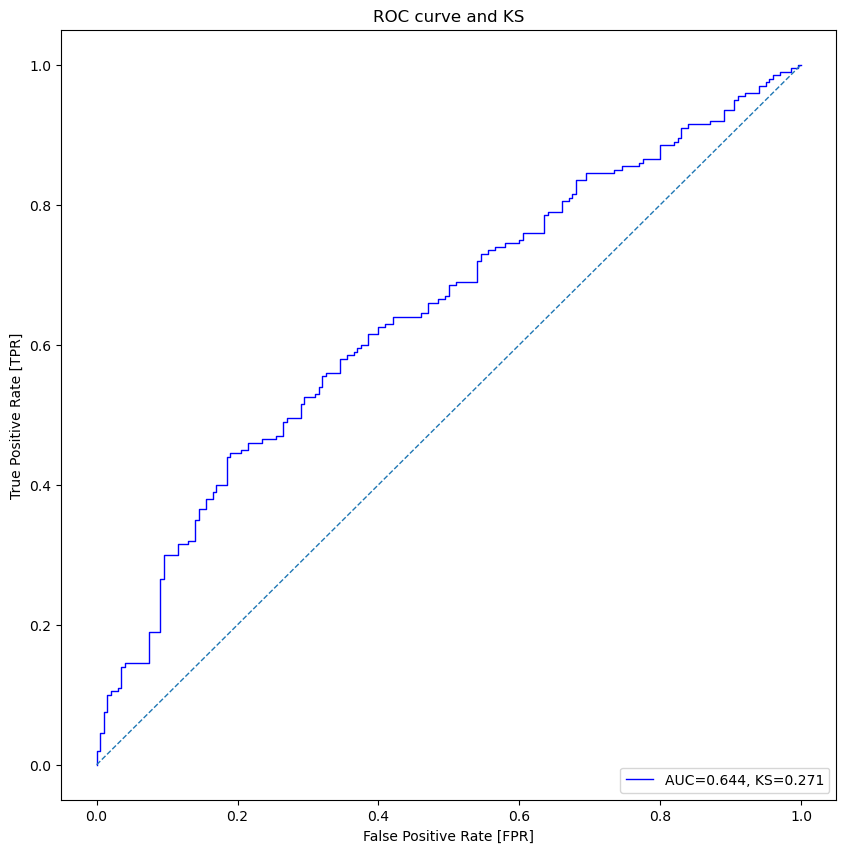

In [20]:
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

prob_test = model.predict_proba(X_test)[:,1]
      
fpr, tpr, threshold = roc_curve(y_test, prob_test)
roc_auc = round(auc(fpr, tpr),3)
KS= round(ks_2samp(fpr, tpr)[0],3) 

fig = plt.figure(figsize=(10,10)) # Init figure
plt.plot(fpr, tpr, 'b', linewidth=1, label="AUC="+str(roc_auc)+", KS="+str(KS)) # Plot ROC Curve
plt.plot(np.arange(0,1.01,0.01), np.arange(0,1.01,0.01), linewidth=1,linestyle='dashed') # Plot dashed guess line
plt.legend(loc=4)
plt.xlabel('False Positive Rate [FPR]')
plt.ylabel('True Positive Rate [TPR]')
plt.title('ROC curve and KS')  

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score, roc_auc_score, matthews_corrcoef
import numpy as np

# Definir el modelo
model = LogisticRegression(C=1e40, solver='newton-cg')

# Definir el número de pliegues
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Crear un diccionario de las métricas que queremos calcular
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True),
    'matthews_corrcoef': make_scorer(matthews_corrcoef)
}

# Realizar la validación cruzada
results = cross_validate(model, df_credit.drop(labels=['Default', ], axis=1), df_credit['Default'], cv=cv, scoring=scoring, return_train_score=False)

# Mostrar los resultados
for metric in results.keys():
    if 'test_' in metric:
        print(f'{metric} : {np.mean(results[metric]):.3f} (+/- {np.std(results[metric]):.3f})')



/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not c

test_accuracy : 0.590 (+/- 0.011)
test_precision : 0.589 (+/- 0.015)
test_recall : 0.601 (+/- 0.039)
test_balanced_accuracy : 0.591 (+/- 0.011)
test_f1 : 0.594 (+/- 0.016)
test_roc_auc : 0.633 (+/- 0.004)
test_matthews_corrcoef : 0.182 (+/- 0.021)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not c

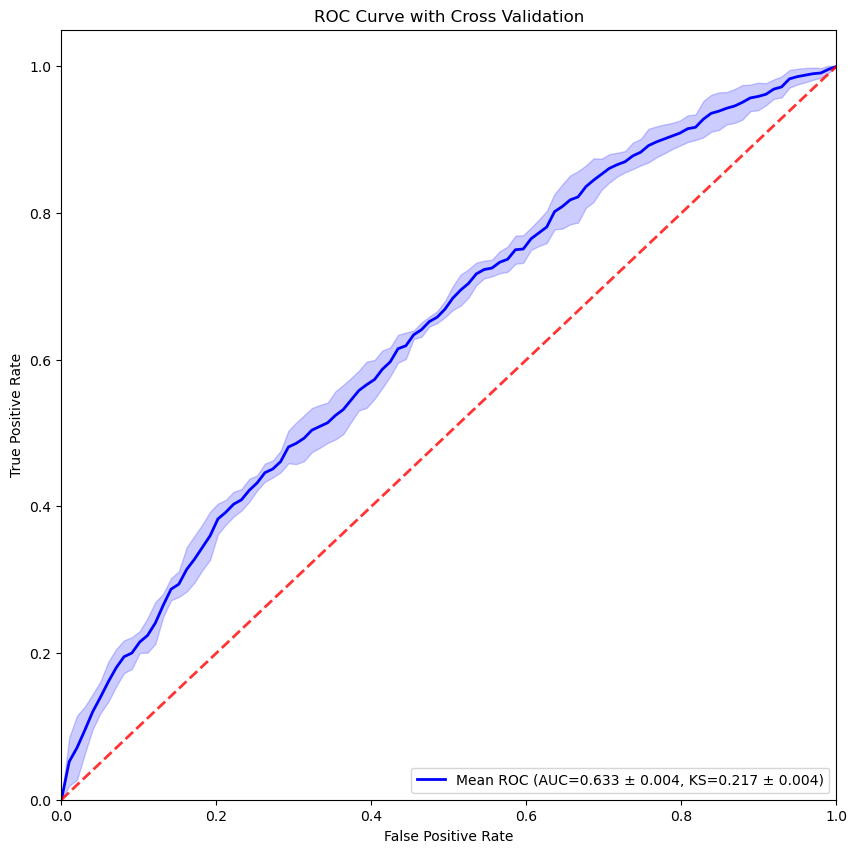

In [25]:
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

# Suponiendo que df_credit ya está definido y contiene tus datos
X = df_credit.drop(labels=['Default', ], axis=1)
y = df_credit['Default']

# Definir el modelo
model = LogisticRegression(C=1e40, solver='newton-cg')

# Configuración de la validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Listas para acumular resultados
tprs = []
fprs = []
aucs = []
ks_values = []
mean_fpr = np.linspace(0, 1, 100)

# Realizar la validación cruzada
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    prob_test = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, prob_test)
    roc_auc = auc(fpr, tpr)
    ks = ks_2samp(fpr, tpr).statistic

    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)
    ks_values.append(ks)
    fprs.append(fpr)

# Calcular las medias y desviaciones estándar
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)
mean_ks = np.mean(ks_values)
std_ks = np.std(ks_values)

# Graficar la curva ROC
fig = plt.figure(figsize=(10, 10))
plt.plot(mean_fpr, mean_tpr, 'b', label=f'Mean ROC (AUC={mean_auc:.3f} ± {std_auc:.3f}, KS={mean_ks:.3f} ± {std_ks:.3f})', lw=2)
plt.fill_between(mean_fpr, mean_tpr - np.std(tprs, axis=0), mean_tpr + np.std(tprs, axis=0), color='blue', alpha=0.2)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Cross Validation')
plt.legend(loc="lower right")
plt.show()



## Leave one Out

No converge

In [26]:
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import roc_curve, auc

# Suponiendo que df_credit ya está definido y contiene tus datos
X = df_credit.drop(labels=['Default'], axis=1)
y = df_credit['Default']

# Definir el modelo
model = LogisticRegression(C=1e40, solver='newton-cg')

# Configuración de la validación Leave-One-Out
cv = LeaveOneOut()

# Listas para acumular resultados
tprs = []
mean_fpr = np.linspace(0, 1, 100)
aucs = []
ks_values = []

# Realizar la validación cruzada Leave-One-Out
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    prob_test = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, prob_test)
    roc_auc = auc(fpr, tpr)
    ks = ks_2samp(y_test, prob_test).statistic

    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)
    ks_values.append(ks)

# Calcular la curva ROC promedio
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)
mean_ks = np.mean(ks_values)
std_ks = np.std(ks_values)

# Graficar la curva ROC promedio
fig = plt.figure(figsize=(10, 10))
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC={mean_auc:.3f} ± {std_auc:.3f}, KS={mean_ks:.3f} ± {std_ks:.3f})', lw=2)
plt.fill_between(mean_fpr, mean_tpr - np.std(tprs, axis=0), mean_tpr + np.std(tprs, axis=0), color='blue', alpha=0.2)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Leave-One-Out Cross Validation')
plt.legend(loc="lower right")
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchW

KeyboardInterrupt: 

/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.11/s

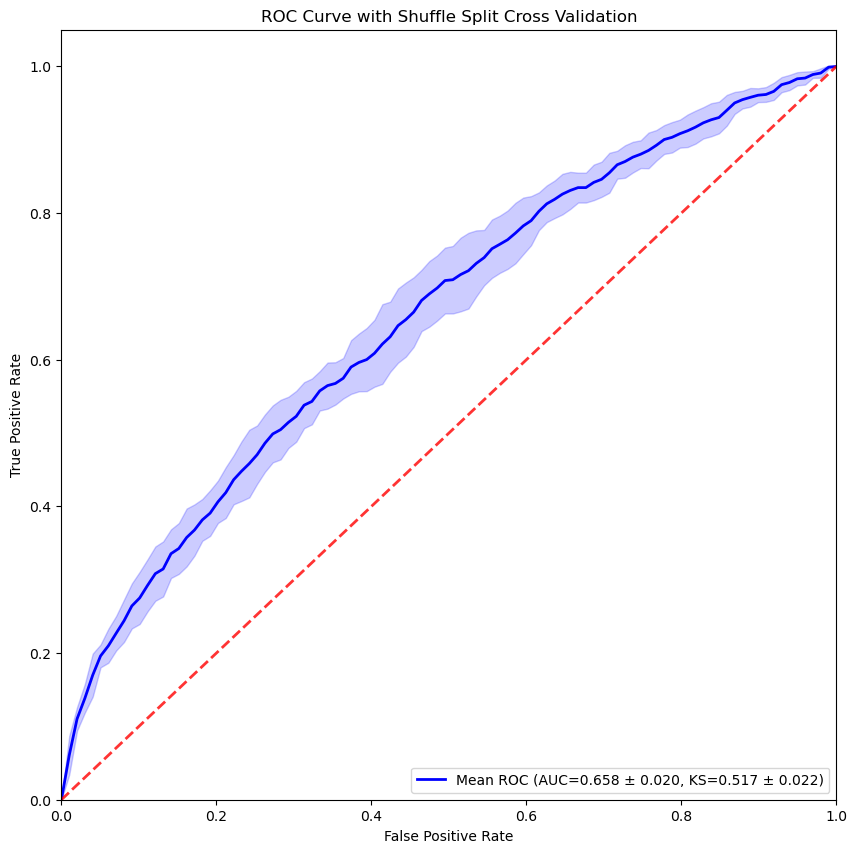

In [27]:
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc

# Suponiendo que df_credit ya está definido y contiene tus datos
X = df_credit.drop(labels=['Default'], axis=1)
y = df_credit['Default']

# Definir el modelo
model = LogisticRegression(C=1e40, solver='newton-cg')

# Configuración de la validación ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Listas para acumular resultados
tprs = []
mean_fpr = np.linspace(0, 1, 100)
aucs = []
ks_values = []

# Realizar la validación cruzada ShuffleSplit
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    prob_test = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, prob_test)
    roc_auc = auc(fpr, tpr)
    ks = ks_2samp(y_test, prob_test).statistic

    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)
    ks_values.append(ks)

# Calcular la curva ROC promedio
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)
mean_ks = np.mean(ks_values)
std_ks = np.std(ks_values)

# Graficar la curva ROC promedio
fig = plt.figure(figsize=(10, 10))
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC={mean_auc:.3f} ± {std_auc:.3f}, KS={mean_ks:.3f} ± {std_ks:.3f})', lw=2)
plt.fill_between(mean_fpr, mean_tpr - np.std(tprs, axis=0), mean_tpr + np.std(tprs, axis=0), color='blue', alpha=0.2)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Shuffle Split Cross Validation')
plt.legend(loc="lower right")
plt.show()


# La función Pipeline en Python

La función `Pipeline` en Python es una herramienta muy útil en la biblioteca `scikit-learn` que permite encadenar múltiples pasos de procesamiento y modelado en una única secuencia. Esto facilita la creación y gestión de flujos de trabajo de aprendizaje automático de manera ordenada y reproducible.

## Descripción de `Pipeline`

La clase `Pipeline` permite agrupar una serie de transformaciones y un estimador final en un único objeto. Cada paso en el pipeline debe ser una pareja `(nombre, transformador)`, donde `nombre` es un identificador del paso y `transformador` es un objeto que sigue la interfaz de `scikit-learn`, es decir, que implementa los métodos `fit` y `transform` para transformadores, o `fit` y `predict` para estimadores.

## Ventajas del uso de `Pipeline`

- **Organización del Código**: Mantiene el código limpio y organizado al encapsular todas las etapas del procesamiento de datos y modelado en un solo objeto.
- **Evita el Data Leakage**: Garantiza que las transformaciones de datos se ajusten solo a los datos de entrenamiento y no a los datos de prueba, evitando así el problema del data leakage.
- **Facilita la Experimentación**: Permite cambiar fácilmente los componentes del flujo de trabajo sin necesidad de modificar el código en varios lugares.
- **Reproducibilidad**: Facilita la reproducción de experimentos al tener un único objeto que define todo el flujo de trabajo.

## Ejemplo de Uso

A continuación se presenta un ejemplo de cómo utilizar `Pipeline` para un flujo de trabajo que incluye el escalado de características y la aplicación de un modelo de regresión logística:

```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar datos de ejemplo
data = load_iris()
X = data.data
y = data.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el pipeline con dos pasos: escalado y regresión logística
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Predecir con el pipeline en los datos de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")



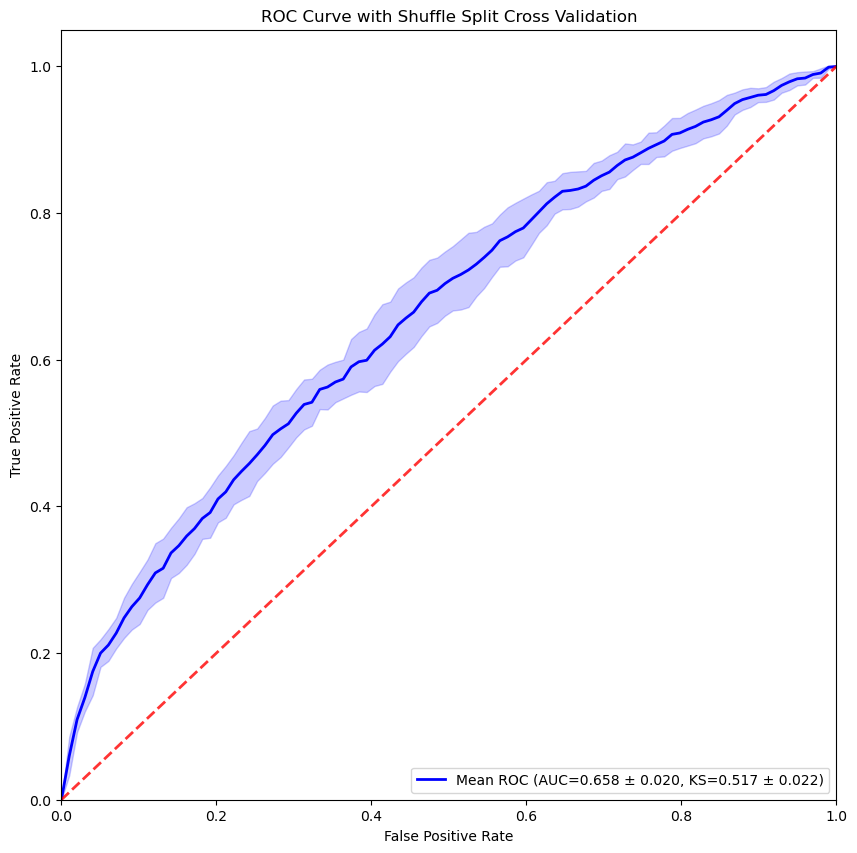

In [29]:
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Suponiendo que df_credit ya está definido y contiene tus datos
X = df_credit.drop(labels=['Default'], axis=1)
y = df_credit['Default']

# Definir el modelo dentro de un pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de los datos
    ('classifier', LogisticRegression(C=1e40, solver='newton-cg'))
])

# Configuración de la validación ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Listas para acumular resultados
tprs = []
mean_fpr = np.linspace(0, 1, 100)
aucs = []
ks_values = []
y_true = []
y_proba = []

# Realizar la validación cruzada ShuffleSplit
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train, y_train)
    prob_test = pipeline.predict_proba(X_test)[:, 1]

    y_true.extend(y_test)
    y_proba.extend(prob_test)

    fpr, tpr, _ = roc_curve(y_test, prob_test)
    roc_auc = auc(fpr, tpr)
    ks = ks_2samp(y_test, prob_test).statistic

    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    aucs.append(roc_auc)
    ks_values.append(ks)

# Calcular la curva ROC promedio
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)
mean_ks = np.mean(ks_values)
std_ks = np.std(ks_values)

# Graficar la curva ROC promedio
fig = plt.figure(figsize=(10, 10))
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC={mean_auc:.3f} ± {std_auc:.3f}, KS={mean_ks:.3f} ± {std_ks:.3f})', lw=2)
plt.fill_between(mean_fpr, mean_tpr - np.std(tprs, axis=0), mean_tpr + np.std(tprs, axis=0), color='blue', alpha=0.2)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Shuffle Split Cross Validation')
plt.legend(loc="lower right")
plt.show()



# Tarea

Usa la base de datos del cancer https://raw.githubusercontent.com/Andres1984/Data-Analysis-with-R/master/Bases/breast-cancer.csv para hacer un modelo de